In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import random

In [2]:
# Univariate Linear Regression Formula

def uni_linear_regression(x, w = 0, b = 0):
    return np.add(np.multiply(x, w), b)

In [3]:
# Squared Error Function

def squared_error(x, y, w = 0, b = 0):
    y_hat = uni_linear_regression(x, w, b)
    errors = np.subtract(y_hat, y)
    errors_squared = np.multiply(errors, errors)
    summation = np.sum(errors_squared)

    return (1. / (2 * len(x))) * summation

In [4]:
# Gradient Descent

def gradient_descent(x, y, w = 0, b = 0, tolerance = 0.05, num_wrong_steps = 10, verbose = False, return_steps_errors = False, lr = 0.001):
    prev_error = float("inf")
    lines = []
    errors = []
    steps = 1
    wrong_count = 0
    while wrong_count < num_wrong_steps:
        # New w calculation
        y_hats = uni_linear_regression(x, w, b)
        w_temp_summation = np.subtract(y_hats, y)
        w_temp_summation = np.multiply(w_temp_summation, x)
        w_temp_partial = np.mean(w_temp_summation)
        w_temp = w - (lr * w_temp_partial)

        # New b calculation
        b_temp_summation = np.subtract(y_hats, y)
        b_temp_partial = np.mean(b_temp_summation)
        b_temp = b - (lr * b_temp_partial)

        w, b = w_temp, b_temp

        error = squared_error(x, y, w, b)
        if return_steps_errors:
            lines.append((w, b))
            errors.append(error)

        if verbose:
            print(f"Step {steps}:\nw: {w}\nb: {b}\nerror: {error}")
        
        if error > prev_error:
            # lr = lr * 0.75
            wrong_count += 1
        elif prev_error - error < tolerance:
            break
        
        prev_error = error
        steps += 1

    if return_steps_errors:
        return w, b, lines, errors
    else:
        return w, b


In [26]:
test_x = np.linspace(0, 1000, num=50)
test_y = np.add(np.linspace(0, 100, num=50), np.random.randint(-20, 20, 50) ) + 27

lr = 0.000005

w, b = gradient_descent(test_x, test_y, tolerance=0.00001, lr = lr)

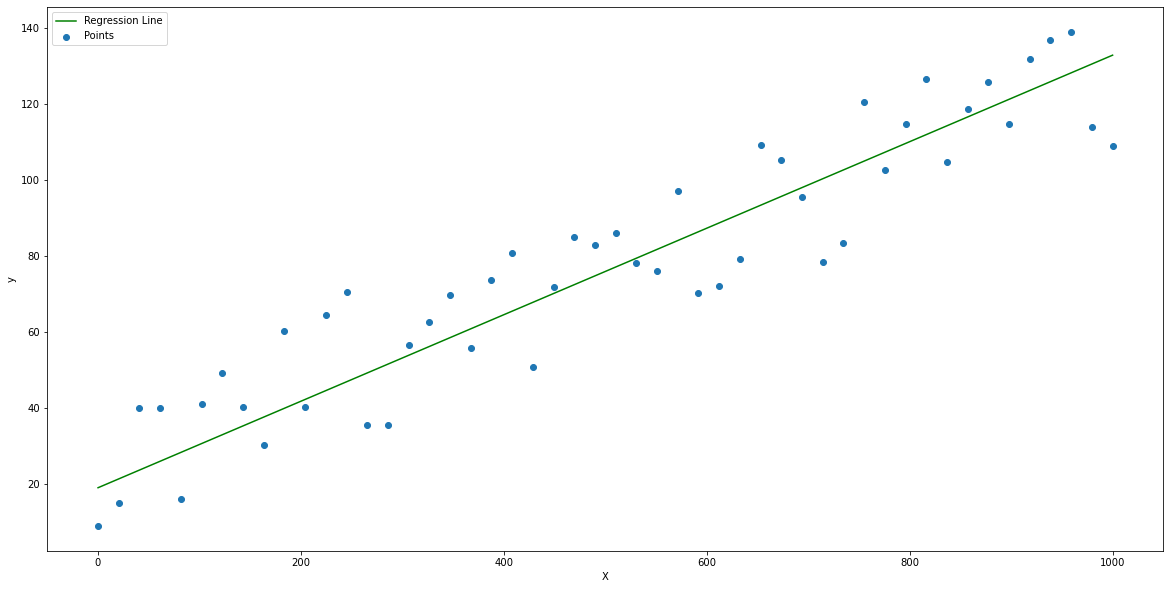

In [29]:
final = np.add(np.multiply(w, test_x), b)

plt.figure(figsize=(20, 10))
plt.scatter(test_x, test_y, label = "Points")
plt.plot(test_x, final, c = "g", label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()

In [28]:
print(w, b)

0.11371488251856678 19.088348626050056
